# Custom Layers in Keras

# Task 1: Importing Libraries

In [3]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# Task 2: Import and Visualize Dataset

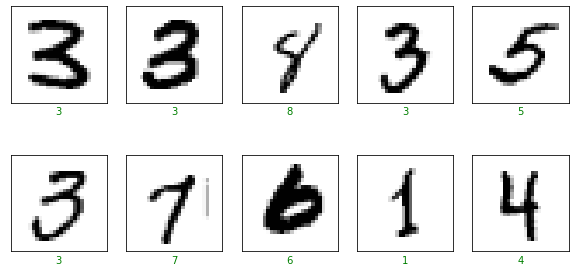

In [6]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show() 

# Task 3: Creating a Custom Layer

# Task 4: Creating the Model

# Task 5: Model Training

# Task 6: Comparison with ReLU